# Exploratory Data Analysis - Retail
## by - Manasvi Narayan

### Importing required libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Understanding the Dataset
After reading the csv file we take a look at the dataset. There are several categorical variables and a few numerical values. Using the describe function we can find some stastical insight into our data.

In [3]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


### Finding correlation between variables 
After taking a look at the correlation matrix and the heatmap we can infer that Profit and Sales are significantly related and so is quantity and sales. We can also see that discount is inversely proportional to profit while Postal code is of no significance to other variables

In [6]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [7]:
sns.color_palette("mako", as_cmap=True)

<AxesSubplot:>

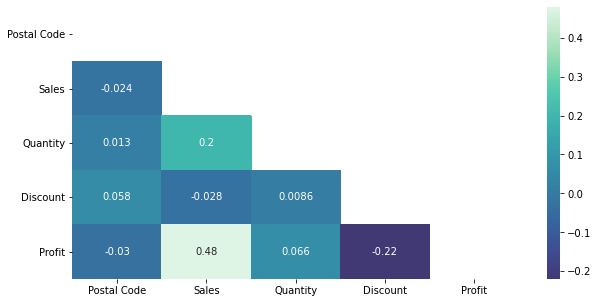

In [8]:
plt.figure(figsize=(10,5))
mat = np.triu(df.corr())
sns.heatmap(data=df.corr(), center=0, annot=True, mask=mat, cmap='mako')

### Analysis by Region and Category
Through the following graphs we can gain insights into the relationship between Sales and Profit for different regions and categories

In [9]:
df.groupby('Region')[['Sales', 'Profit']].sum()

,Sales,Profit
Region,,
Central,501239.8908,39706.3625
East,678781.2400,91522.7800
South,391721.9050,46749.4303
West,725457.8245,108418.4489


<Figure size 1080x720 with 0 Axes>

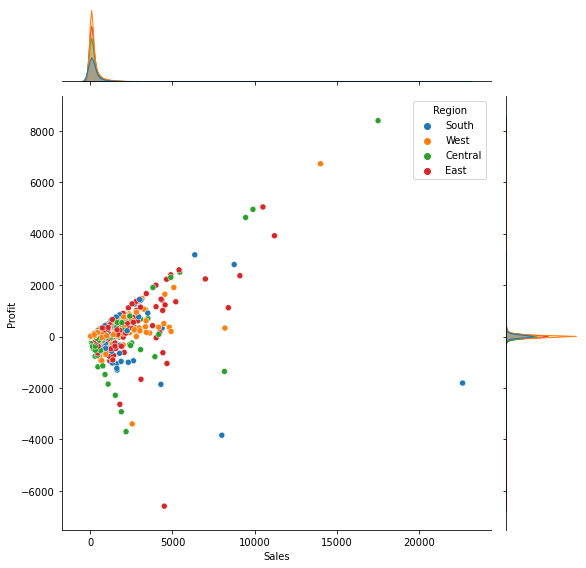

In [10]:
# Graph between Sales and Profit for different regions

plt.figure(figsize=(15,10))
sns.jointplot(data=df, x='Sales', y='Profit', hue='Region', height=8)

In [11]:
df.groupby('Category')[['Sales', 'Profit']].sum()

,Sales,Profit
Category,,
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008
Technology,836154.0330,145454.9481


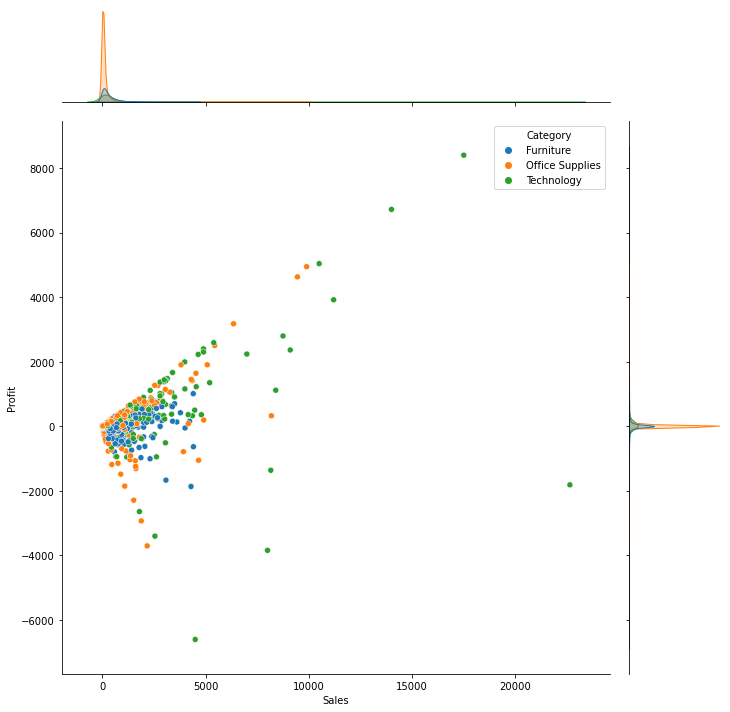

In [12]:
# Graph between Sales and Profit for different categories

sns.jointplot(data=df, x='Sales', y='Profit', hue='Category', height=10)

In [13]:
df.groupby(['Region', 'Category'])[['Sales', 'Profit']].sum()

Sales      Profit
Region  Category                                
Central Furniture        163797.1638  -2871.0494
        Office Supplies  167026.4150   8879.9799
        Technology       170416.3120  33697.4320
East    Furniture        208291.2040   3046.1658
        Office Supplies  205516.0550  41014.5791
        Technology       264973.9810  47462.0351
South   Furniture        117298.6840   6771.2061
        Office Supplies  125651.3130  19986.3928
        Technology       148771.9080  19991.8314
West    Furniture        252612.7435  11504.9503
        Office Supplies  220853.2490  52609.8490
        Technology       251991.8320  44303.6496

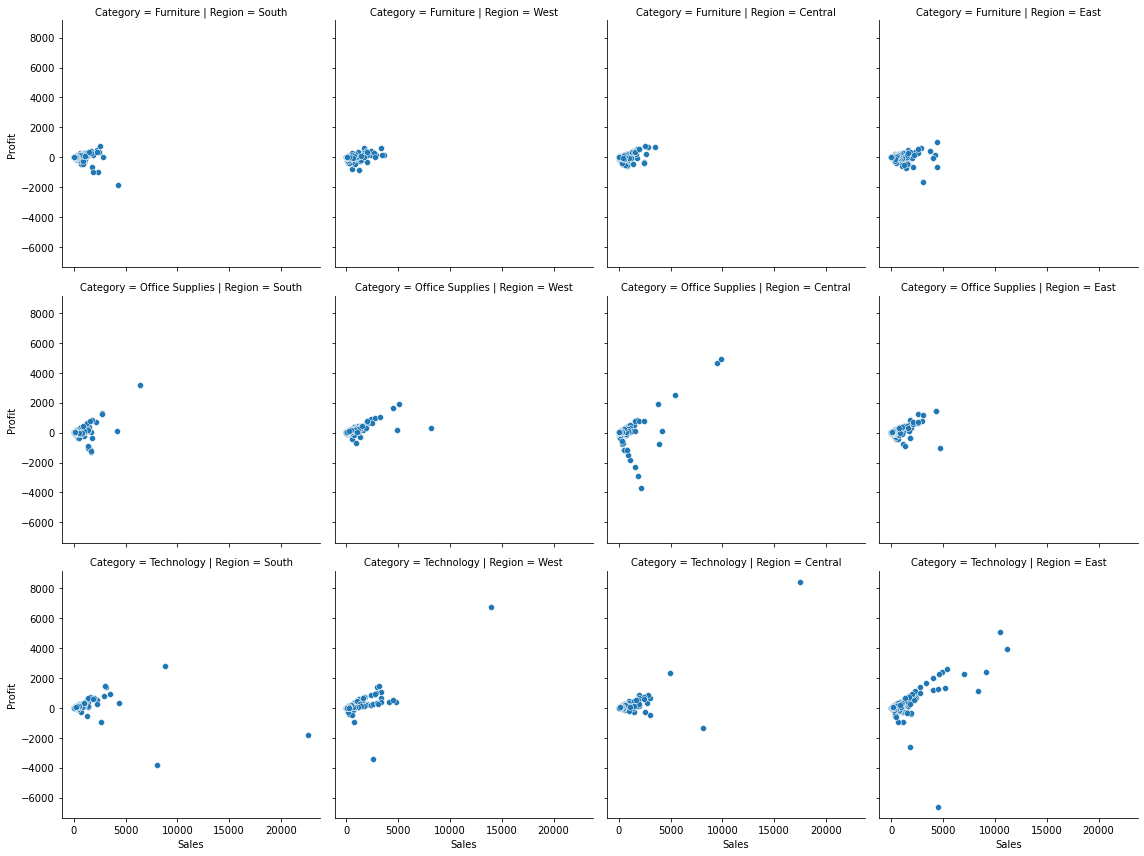

In [14]:
# Graphs depicting performance of different categories in different regions

g = sns.FacetGrid(data=df, col='Region', row='Category', height=4, aspect=1)
g.map(sns.scatterplot, 'Sales', 'Profit')

### Statewise Sales and Profit
The following graphs show the sales and profit in each of the States.

In [27]:
state = df.groupby('State')[['Sales', 'Profit']].sum()
state.sort_values(by='Sales', inplace=True, ascending=False)
state.head()

,Sales,Profit
State,,
California,457687.6315,76381.3871
New York,310876.2710,74038.5486
Texas,170188.0458,-25729.3563
Washington,138641.2700,33402.6517
Pennsylvania,116511.9140,-15559.9603


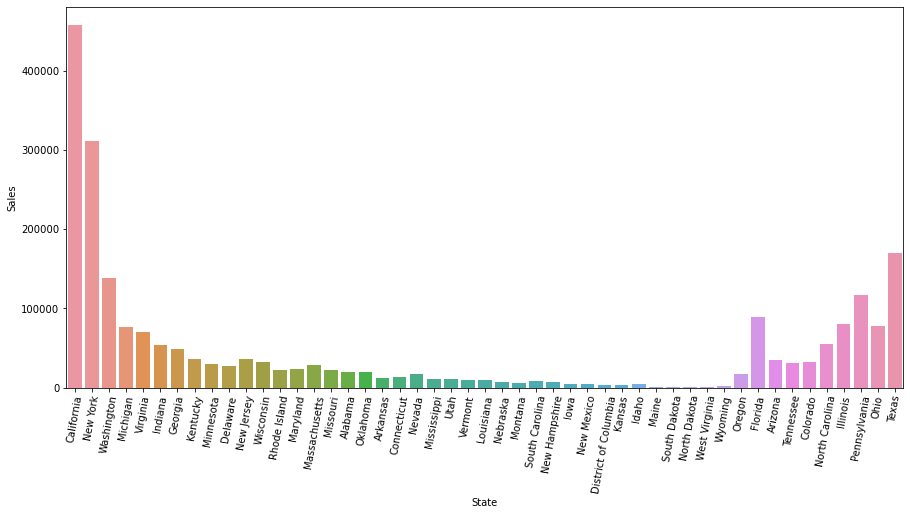

In [34]:
# Graph showing statewise sales

plt.figure(figsize=(15,7))
sns.barplot(data=state,x=state.index,y='Sales')
plt.xticks(rotation=80)
plt.show()

In [29]:
state.sort_values(by='Profit', inplace=True, ascending=False)
state.head()

,Sales,Profit
State,,
California,457687.6315,76381.3871
New York,310876.2710,74038.5486
Washington,138641.2700,33402.6517
Michigan,76269.6140,24463.1876
Virginia,70636.7200,18597.9504


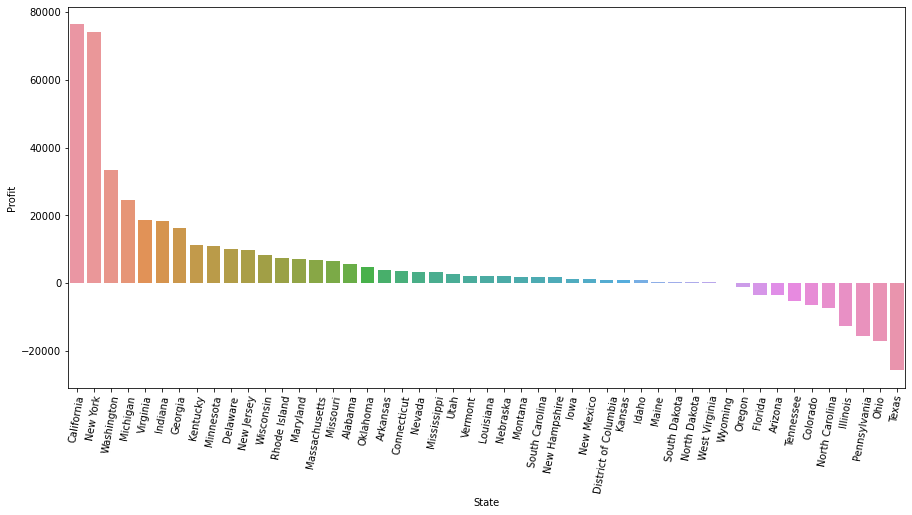

In [32]:
# Graph showing statewise profits

plt.figure(figsize=(15,7))
sns.barplot(data=state,x=state.index,y='Profit')
plt.xticks(rotation=80)
plt.show()

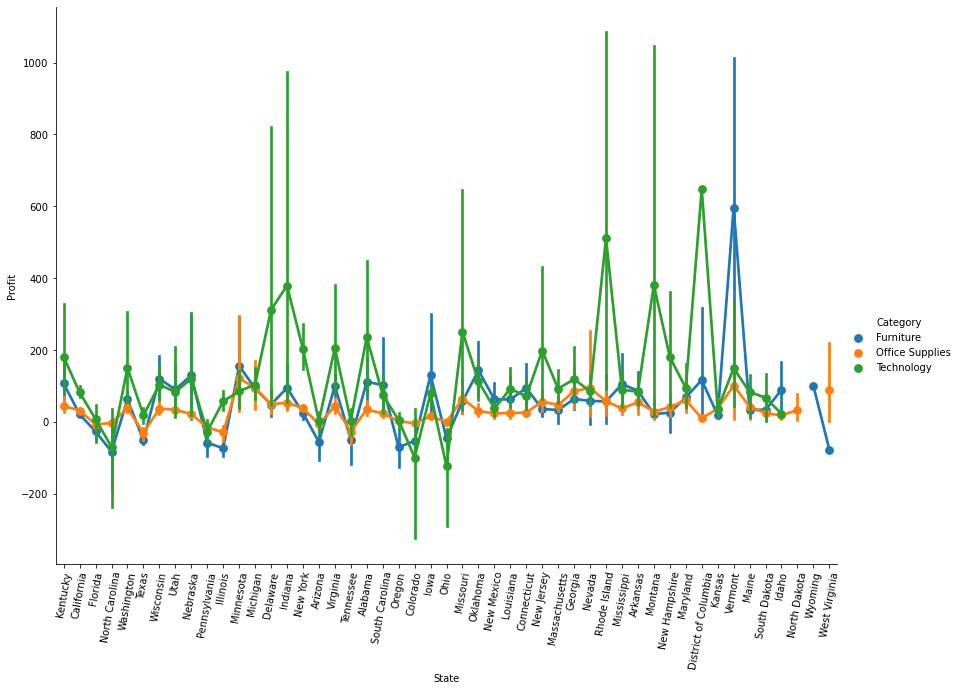

In [18]:
# Graph showing the profits earned in each category by each state

sns.factorplot(data=df, x='State', y='Profit', hue='Category', height=8.27, aspect=11.7/8.27)
plt.xticks(rotation=80)
plt.show()

### Analysis by sub-category of products

If we take a look at qunatities sold in each sub category individually then we can see that is follows an uniform distribution. But the statewise distribution of quantities sold is more varied.

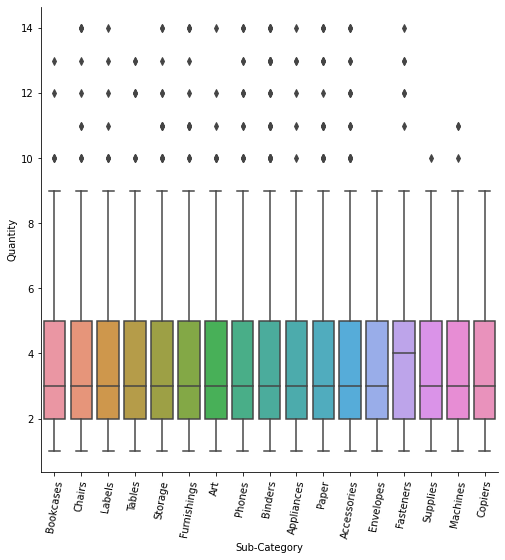

In [36]:
sns.catplot(data=df, x='Sub-Category', y='Quantity', kind='box', height=7)
plt.xticks(rotation=80)
plt.show()

In [20]:
df2 = df.groupby(['Sub-Category', 'State'])['Quantity'].count()
df2 = df2.reset_index()
df2.sample(10)

,Sub-Category,State,Quantity
116,Art,Oregon,14
468,Paper,Massachusetts,27
495,Phones,Alabama,6
87,Art,California,165
635,Tables,Michigan,7
98,Art,Kentucky,12
645,Tables,Oklahoma,4
576,Storage,Tennessee,18
544,Storage,Connecticut,11
552,Storage,Kansas,2


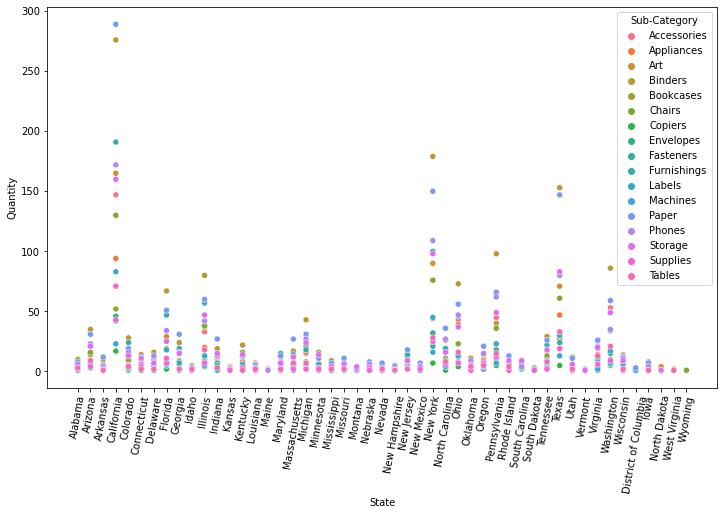

In [33]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df2, x='State', y='Quantity', hue='Sub-Category')
plt.xticks(rotation=80)
plt.show()

### Conclusion
Through these graphs we get a clear view of how sales and profit are related to each other in different regions and for different categories. We also get an overview of which states are performing well and in which states the profit and sales need to be increased. To do this the analysis of subcategories is useful as we get an insight of which products are most in demand in different states.